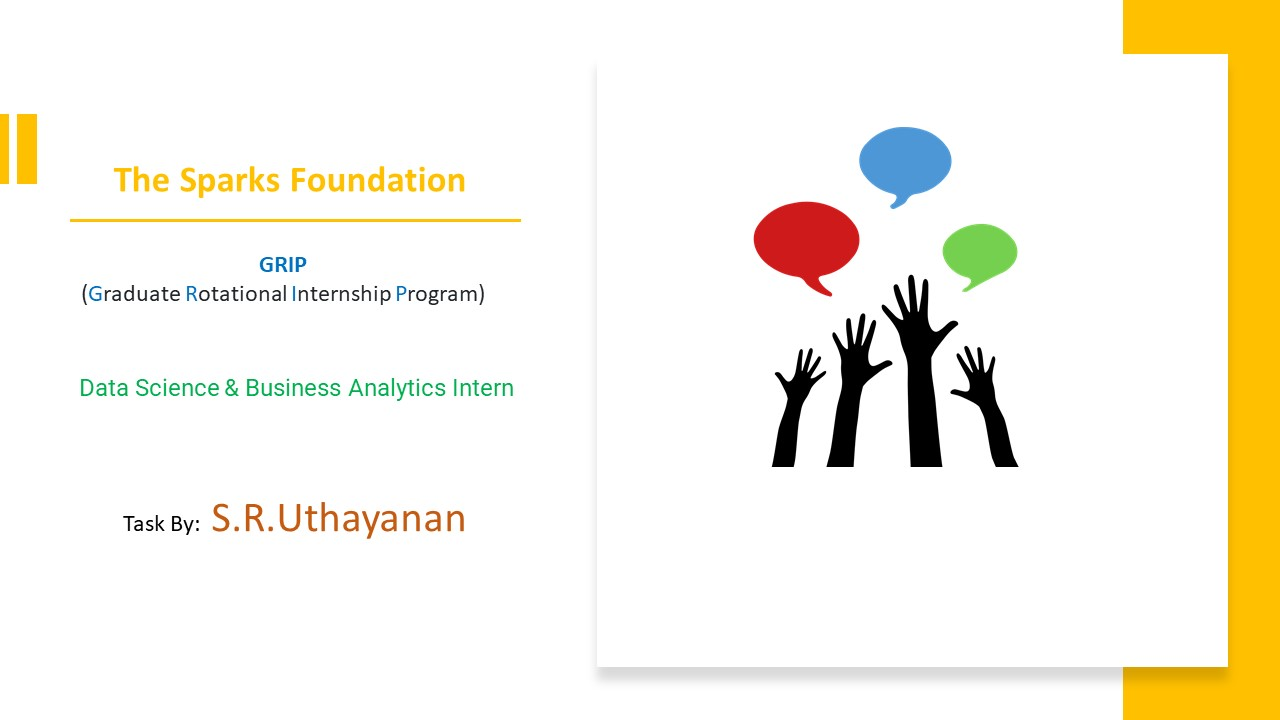

# Task-1: Prediction Using Supervised ML

## Problem Statement:

- Predict the percentage of a student based on the number of study hours.

- Predict the score if a student studies for 9.25 hrs/day?

## Data Description:

This is a simple linear regression task as it involves just 2 variables.

| Variable  | Description|
: ---------- | ---------- |
| Hours: | Number of hours Studied|
| Scores: | Percentage of Marks Scored|

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

## Import data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

- There are 25 observations in the dataset

### Plotting the distribution of Dataset

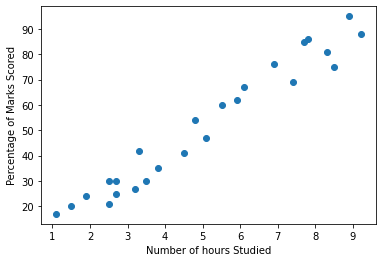

In [23]:
plt.scatter(x='Hours',y='Scores',data=data) 
plt.xlabel('Number of hours Studied')  
plt.ylabel('Percentage of Marks Scored')  
plt.show()

- From the above scatter plot we can see the positive linear relation between both the variables.

## Train / Test data Preparation

In [27]:
X = data.loc[:,data.columns != 'Scores']
y = data.Scores

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [29]:
print(X_train.shape)
print(y_train.shape)

(20, 1)
(20,)


In [30]:
print(X_test.shape)
print(y_test.shape)

(5, 1)
(5,)


## ML Model Training Using Linear Regression algorithm

In [31]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train) # Calculating b1 & b2

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [32]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df_pred

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


### Model Evaluation

In [33]:
from sklearn import metrics

RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))

print('Test RMSE: ',RMSE_test)
print('Train RMSE: ',RMSE_train)

Test RMSE:  8.299453038771674
Train RMSE:  4.785984052203852


In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred_test)
r2

0.8421031525243527

## Plotting the Regression Line (Best Fit Line)

In [34]:
b1 =linreg.intercept_
b2 = linreg.coef_

In [35]:
print('Intercept:',b1)
print('Coefficients:',b2) 

Intercept: -1.5369573315500702
Coefficients: [10.46110829]


In [36]:
line = b1+b2*X

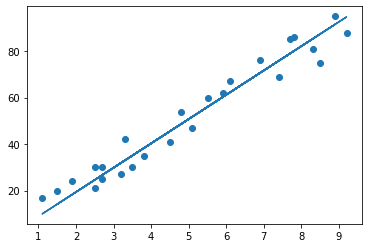

In [37]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Predict the score if a student studies for 9.25 hrs/day?

In [40]:
hours = 9.25

In [42]:
prediction = linreg.predict([[hours]])
print("No of Hours Studied ={}".format(hours))
print("Predicted Percentage of Score = {}".format(prediction))

No of Hours Studied =9.25
Predicted Percentage of Score = [95.22829438]
